# Sharpe ratio and other portfolio statistics

In [1]:
# assume portfolio is allocation of funds to a set of stocks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DataHelper import DataHelper

pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Daily portfolio value
start_val = 1000000 # one million
start_date = "2009-1-1"
end_date = "2011-12-31"
symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
allocs = [0.4, 0.4, 0.1, 0.1]

In [2]:
data = DataHelper.GetPriceHistory(symbols, start_date, end_date)

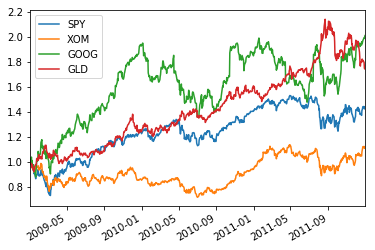

In [3]:
DataHelper.normalize_data(data).plot()
plt.show()

#### how do we calculate the total value of the portfolio day by day?



In [4]:
# we normalize the data, so then each day we have a multiplier
# so if on day 2 for e.g. GOOG is 1.2, then we do 1.2 * money invested in GOOG

ndata = DataHelper.normalize_data(data)
#ndata['pvalue'] = ((ndata['SPY'] * allocs[0]) + (ndata['XOM'] * allocs[1]) + (ndata['GOOG'] * allocs[2]) + (ndata['GLD'] * allocs[3])) * start_val
ndata['pvalue'] = 0
for a in range(0,len(allocs)):
    ndata['pvalue'] = ndata['pvalue'] + (ndata.ix[:,a] * allocs[a] * start_val)
ndata.tail(5)


,SPY,XOM,GOOG,GLD,pvalue
2011-12-23,1.44228,1.12285,1.97043,1.81271,1404367.61646
2011-12-27,1.44343,1.12366,1.99256,1.79647,1405739.86265
2011-12-28,1.42442,1.10916,1.99085,1.75148,1387665.19815
2011-12-29,1.43917,1.12352,1.99925,1.74348,1399350.42307
2011-12-30,1.43214,1.11681,2.01015,1.76261,1396856.82252


In [5]:
# daily returns, the first day is always 0, so we want to EXCLUDE the first day of daily returns
dailyReturns= DataHelper.compute_daily_returns(ndata)[1:]

dailyReturns.std()

In [6]:
# easier way to calculate portfolio value
normed = DataHelper.normalize_data(data)
alloced = normed * allocs
pos_vals = alloced * start_val
port_val = pos_vals.sum(axis=1)
port_val.tail()

2011-12-23   1404367.61646
2011-12-27   1405739.86265
2011-12-28   1387665.19815
2011-12-29   1399350.42307
2011-12-30   1396856.82252
dtype: float64

#### Portfolio statistics

In [7]:
# we want daily returns, with first day removed
daily_rets = ((port_val / port_val.shift(1)) - 1).fillna(0)[1:]
# cum_ret - how much value has gone up from beginning to end
print("cum_ret", port_val[-1]/port_val[0])
# avg_daily_ret - average of returns
print("daily_ret", daily_rets.mean())
# std_daiily_ret
print("std_daily_ret", daily_rets.std())
# sharpe ratio


cum_ret 1.39685682252
daily_ret 0.0005164937963338698
std_daily_ret 0.012143025495758342


### Sharpe Ratio

In [8]:
# Sharpe Ratio = risk adjusted return
# considers the risk free rate of return, i.e. the interest rate you get from a bank savings account or LIBOR or 3-month T-Bill

# portfolio return, risk free rate of return, std dev of portfolio return
# how can you compute risk adjusted return from these values?

# (portfolio return - risk free return) / std dev of portfolio return

# S = $\frac{E[R_{p} - R_{f}]}{\sigma [R_{p} - R_{f} ] }$ = mean(daily_rets - daily_rf) / std(daily_rets)

what is the risk free rate? 

- LIBOR
- 3mo T-bill
- 0%

traditional shortcut for daily risk free rate (if 0.1 is annual risk free rate)  = 
# $ \sqrt[252]{1.0 + 0.1} - 1$

so in simple terms, sharpe ratio is the average daily returns over std daily returns

In [9]:
(daily_rets.mean() / daily_rets.std())

0.04253419351826983

Sharpe Ratio can vary widely depending on how frequently you sample

SR is an annual measure

SR annualized = k * SR
k = sqrt(#samples per year)
    i.e. daily, k would be 252, weekly 52, monthly 12

In [10]:
(daily_rets.mean() / daily_rets.std()) * (252 **(1/2.0))

0.6752093895962245

In [11]:
# e.g., .001 daily avg return, .0002 risk free, .001 std
(252 ** (1/2.0)) * (.001 - .0002) / .001

12.699606293110037

#### sharpe ratio treats both "upward" and "downward" deviations.  Other measures focus on the downside (because that's really the risk) such as Sortino ratio.